In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
input_data = pd.read_csv('Train_Loan_Home.csv')
input_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
!pip install missingno

In [9]:
input_data.shape

(614, 13)

In [10]:
input_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
input_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
input_data['LoanAmount'].fillna((input_data['LoanAmount'].mean()),inplace=True)
input_data['Loan_Amount_Term'].fillna((input_data['Loan_Amount_Term'].mean()),inplace=True)
input_data['Credit_History'].fillna((input_data['Credit_History'].mean()),inplace=True)


In [13]:
input_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

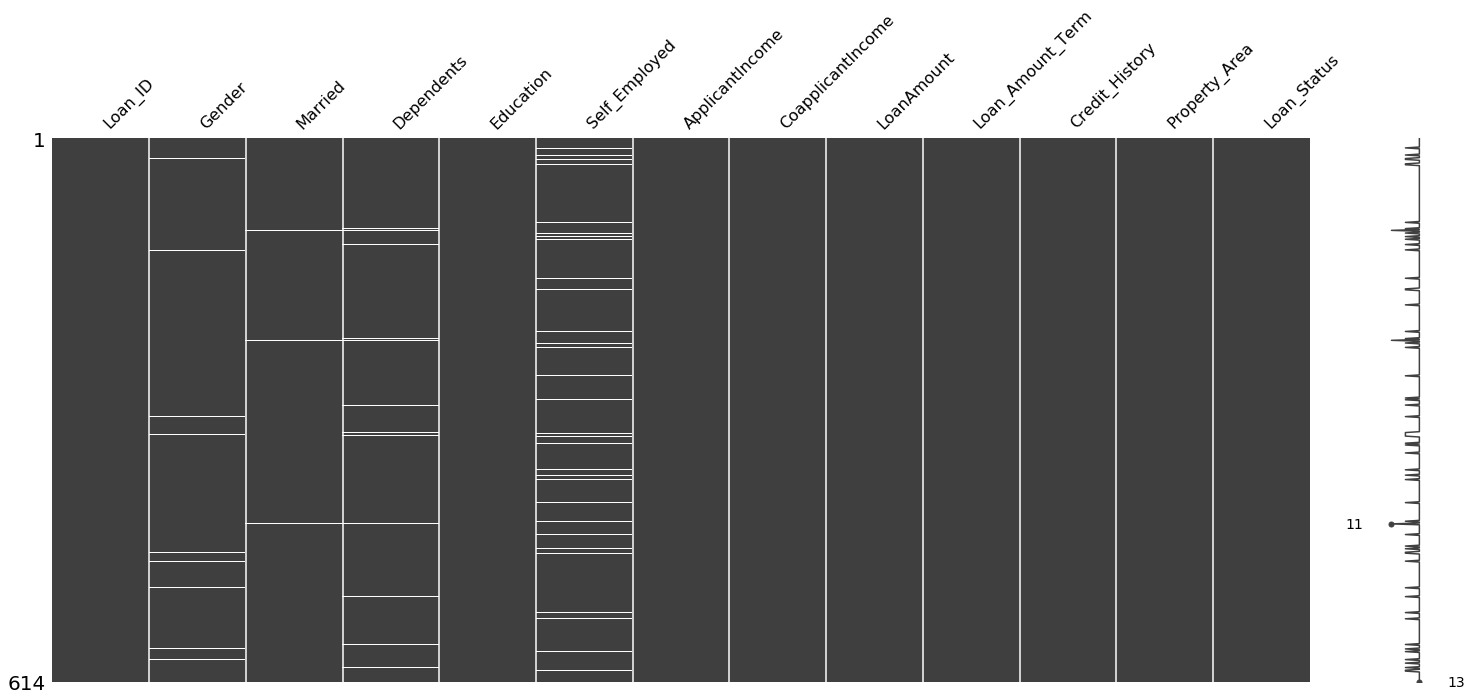

In [14]:
import missingno as msno
msno.matrix(input_data)

In [15]:
input_data.dropna(inplace=True)

In [16]:
input_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


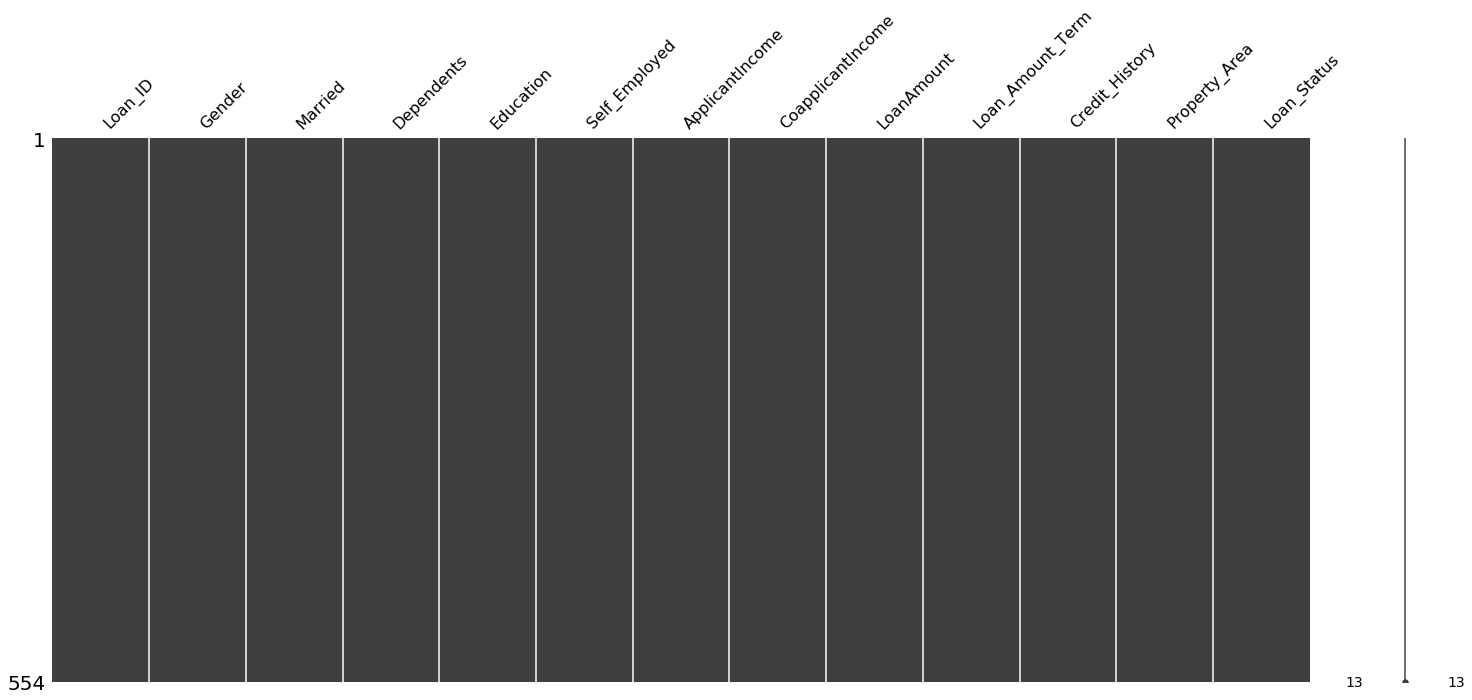

In [17]:
import missingno as msno
msno.matrix(input_data)

In [18]:
def fun2(x):
    if x=="No":
        return 0
    else:
        return 1

In [19]:
input_data['Self_Employed'] = input_data.Self_Employed.apply(fun2)
input_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
def Education(x):
    if x=="Graduate":
        return 1
    elif x== "Not Graduate" :  
        return 0
    else:
        return 3

In [21]:
input_data['Education'] = input_data.Education.apply(Education)

In [22]:
input_data['Property_Area'].nunique()

3

In [23]:
Property_Area = pd.get_dummies(input_data['Property_Area'])
Gender = pd.get_dummies(input_data['Gender'])
input_data.drop(['Property_Area','Gender'], axis =1, inplace=True)

In [24]:
Property_Area

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [25]:
input_data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,No,0,1,0,5849,0.0,146.412162,360.0,1.0,Y
1,LP001003,Yes,1,1,0,4583,1508.0,128.000000,360.0,1.0,N
2,LP001005,Yes,0,1,1,3000,0.0,66.000000,360.0,1.0,Y
3,LP001006,Yes,0,0,0,2583,2358.0,120.000000,360.0,1.0,Y
4,LP001008,No,0,1,0,6000,0.0,141.000000,360.0,1.0,Y


In [26]:
def fun1(x):
    if x== "N":
        return 0
    else:
        return 1

In [27]:
input_data['o/p'] = input_data.Loan_Status.apply(fun1)
input_data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,o/p
0,LP001002,No,0,1,0,5849,0.0,146.412162,360.0,1.0,Y,1
1,LP001003,Yes,1,1,0,4583,1508.0,128.000000,360.0,1.0,N,0
2,LP001005,Yes,0,1,1,3000,0.0,66.000000,360.0,1.0,Y,1
3,LP001006,Yes,0,0,0,2583,2358.0,120.000000,360.0,1.0,Y,1
4,LP001008,No,0,1,0,6000,0.0,141.000000,360.0,1.0,Y,1


In [28]:
input_data.drop(['Loan_ID','Married','Dependents','Loan_Status','Loan_Amount_Term'], axis=1, inplace=True)

In [29]:
cols = ['CoapplicantIncome', 'LoanAmount', 'Credit_History']
input_data[cols] = input_data[cols].applymap(np.int64)

In [30]:
input_data.drop(input_data.index[546], inplace=True)

In [51]:
input_data.head(20)

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,o/p
0,1,0,5849,0,146,1,1
1,1,0,4583,1508,128,1,0
2,1,1,3000,0,66,1,1
3,0,0,2583,2358,120,1,1
4,1,0,6000,0,141,1,1
5,1,1,5417,4196,267,1,1
6,0,0,2333,1516,95,1,1
7,1,0,3036,2504,158,0,0
8,1,0,4006,1526,168,1,1
9,1,0,12841,10968,349,1,0


In [32]:
input_data.dtypes

Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Credit_History       int64
o/p                  int64
dtype: object

In [33]:
x = input_data.drop(['o/p'],axis=1)

In [34]:
y = input_data['o/p']

# DecisionTree

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.5, random_state=1)

In [53]:
from sklearn import tree
ctree = tree.DecisionTreeClassifier()
ctree.fit(x_train, y_train)
y_pred = ctree.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6534296028880866


In [54]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = { "criterion"       :  ['gini', 'entropy'],
                "max_features"   :  [1,2,3, 4 ,5],
                "splitter"       :  ['best', 'random'],
              "min_samples_leaf"  :  [2,3],
               "max_depth"        : [1,2,3,4,5]}

In [66]:
optimized_tree = GridSearchCV(ctree, param_grid, scoring = 'accuracy', verbose=2, cv=10)

In [67]:
optimized_tree.fit(x_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] crite

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=1, min_samples_leaf

[CV]  criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=3, min_samples_leaf=2, spli

[CV]  criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=1, max_features=4, min_samples_leaf=2

[CV]  criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=1, max_features=5, min_samples_leaf=3, spli

[CV]  criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=1, min_samples_le

[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=3, min_

[CV]  criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=4, min_

[CV]  criterion=gini, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_le

[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, spli

[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, split

[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=4, min_sample

[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=5, min_

[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=2, min_

[CV] criterion=gini, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=3, min_samples_l

[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_leaf=3, spli

[CV]  criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=5, max_features=1, min_samples_leaf=2, spli

[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=2, min_samples_le

[CV]  criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=3, min_

[CV]  criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=4, min_sa

[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=5, max_features=5, min_

[CV]  criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_fea

[CV]  criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_fea

[CV]  criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, m

[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=2, max_fea

[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_fea

[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_fea

[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=3, m

[CV]  criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=entropy, 

[CV]  criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=4, max_f

[CV]  criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_fea

[CV]  criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=5, max_fea

[CV]  criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   17.9s finished
C:\Users\Kalyan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                     

In [68]:
optimized_tree.best_score_

0.7862318840579711

In [69]:
optimized_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
final_model = optimized_tree.best_estimator_

In [71]:
y_test_pred = final_model.predict(x_test)

In [72]:
metrics.accuracy_score(y_test,y_test_pred) # 90% intelligence power

0.7328519855595668

In [73]:
import pickle

In [74]:
pickle.dump(final_model,open('test.pk','wb'))

# RandomForest

In [32]:
 from sklearn.ensemble import RandomForestClassifier

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.4, random_state=1)

In [34]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)

In [35]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
y_pred = clf.predict(x_test)

In [37]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7072072072072072


In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {  "n_estimators"     : [100, 200, 300, 500, 1000],
               'criterion'       :  ['gini', 'entropy'],
                'max_features'   :  [1,2,4,5],
                'min_samples_split'       :  [2,4],
              'min_samples_leaf'  :  [2,3],
               'max_depth'        : [1,2,3,4,5,6,7]
            }
clf = RandomForestClassifier()
optimized_tree = GridSearchCV(clf, param_grid, scoring='accuracy', verbose=2, cv=10, n_jobs = -1)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
optimized_tree.fit(x_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.5s


In [ ]:
optimized_tree.best_score_ 

In [ ]:
final_model = optimized_tree.best_estimator_

In [ ]:
y_test_pred = final_model.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

In [100]:
import pickle

In [101]:
pickle.dump(final_model, open('test.pk', 'wb'))

# SVM

In [103]:
from sklearn import svm
clf = svm.SVC(gamma='scale')

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.45, random_state=1)

In [105]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
y_pred = clf.predict(x_test)

In [107]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6947791164658634


# Neural network

In [108]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=1, max_iter=1, warm_start=True)

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.45, random_state=1)

In [110]:
clf.fit(x_train, y_train)

C:\Users\Kalyan\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [111]:
y_pred = clf.predict(x_test)

In [112]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.2971887550200803


# naive_bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.45, random_state=1)

In [115]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
y_pred = gnb.predict(x_test)

In [117]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7791164658634538
